<a href="https://colab.research.google.com/github/antndlcrx/Intro-to-Python-DPIR/blob/main/Week%204/W4_visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://cdn.githubraw.com/antndlcrx/Intro-to-Python-DPIR/main/images/logo_dpir.png?raw=true:,  width=35" alt="My Image" width=175>  

# Week 4: Visualisation with Matplotlib and Seaborn

Welcome to Week 4! This session is about turning your data analysis skills into visual communication. By the end of today, you'll be able to create publication-quality plots and multi-panel dashboards that reveal patterns in real data.


## **What We'll Learn Today**

1. **The Figure–Axes model**: how Matplotlib organises plots
2. **Core plot types**: line, scatter, histogram
3. **Customisation**: labels, legends, annotations, styles
4. **Subplots**: combining multiple plots in one figure
5. **Seaborn fundamentals**: statistical visualisation built on Matplotlib
6. **Faceting and regression plots**: comparing groups visually
7. **Dashboard capstone**: telling a story with a multi-panel figure

---

### **How This Connects**

```
Week 1: Python fundamentals (variables, loops, functions)
    ↓
Week 2: NumPy (arrays, vectorisation, broadcasting)
    ↓
Week 3: Pandas (DataFrames, real-world data)
    ↓
Week 4: Visualisation (Matplotlib & Seaborn)  ← YOU ARE HERE
    ↓
Week 5: Classes
    ↓
Week 6: scikit-learn (visualising model performance)
    ↓
Week 7: Word embeddings
```

Everything you learned in Weeks 2–3 transfers directly:
- **NumPy arrays** → Matplotlib plots arrays natively
- **DataFrame columns** → Seaborn's `x=`, `y=`, `hue=` parameters take column names directly
- **Boolean indexing / groupby** → filtering data before plotting, or letting Seaborn facet for you
- **The QOG dataset** → now we *see* the patterns we computed last week

The key shift: Weeks 2–3 were about *computing* answers. This week is about *communicating* them.

In [1]:
import matplotlib.pyplot as plt  # standard alias
import numpy as np
import pandas as pd

In [4]:
# Load the QOG dataset (same as Week 3)
# !git clone https://github.com/antndlcrx/Intro-to-Python-DPIR.git 2>/dev/null

qog_link = '../datasets/qog2022.csv'
qog = pd.read_csv(qog_link)
qog.head()

,country,region,iso3c,perc_wip,gdp_pc,corruption,hdi,glob_index,fh_polity,fh_status
0,Afghanistan,Asia,AFG,27.868853,1934.555054,0.908,0.509,38.519566,3.500000,Not Free
1,Albania,Europe,ALB,27.857143,11104.166016,0.796,0.792,66.650490,8.083333,Partly Free
2,Algeria,Africa,DZA,25.757576,14228.025391,0.714,0.746,56.150364,4.250000,Not Free
3,Andorra,Europe,AND,32.142857,NaN,NaN,0.867,50.380840,10.000000,Free
4,Angola,Africa,AGO,30.454546,7771.441895,0.629,0.582,42.808849,3.250000,Not Free


As a reminder, the dataset has the following variables:

| Variable      | Description |
|--------------|-------------|
| **country**  | Country name |
| **iso3c**    | Country code (isocode-3) |
| **region**   | Geographic region |
| **fh_status** | Freedom House status (Free, Partly Free, Not Free) |
| **regime**   | Regime type (Closed Autocracy, Electoral Autocracy, Electoral Democracy, Liberal Democracy) |
| **gdp_pc**   | GDP per capita |
| **corruption** | Corruption perception score |
| **hdi**      | Human Development Index |
| **perc_wip** | Percentage of women in parliament |
| **glo_index** | Globalisation index |
| **democracy** | Democracy score (continuous) |

---

# **Part 1: Matplotlib**

<img src="https://cdn.githubraw.com/antndlcrx/Intro-to-Python-DPIR/main/images/W4/matplot_title_logo.png?raw=true:,  width=25" alt="My Image" width=175>

## **1.** The Figure–Axes Model

`matplotlib` is the foundational plotting library in Python. Many libraries (including Seaborn) are built on top of it, so understanding the basics gives you control over *any* Python plot.

The two key objects are:

- **`Figure`**: the overall container, think of it as the canvas or the page
- **`Axes`**: the individual plot area within the figure. This is where data actually gets drawn

One Figure can contain multiple Axes (subplots). All customisation like titles, labels, limits happens on the Axes.

<img src="https://cdn.githubraw.com/antndlcrx/Intro-to-Python-DPIR/main/images/W4/figure_anatomy.png?raw=true:,  width=25" alt="My Image" width=500>

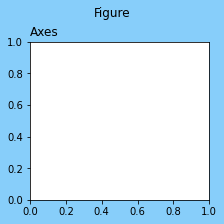

In [5]:
# The Figure is the blue box, the Axes is the white plotting area inside it
fig = plt.figure(figsize=(3, 3),
                 facecolor='lightskyblue',
                 layout='constrained')
fig.suptitle('Figure')
ax = fig.add_subplot()
ax.set_title('Axes', loc='left');

There are two approaches to creating plots:

1. **Explicit (object-oriented)**: create `Figure` and `Axes` objects, then call methods on them
2. **Implicit (pyplot)**: use `plt.plot()`, `plt.scatter()` etc. creates Figure/Axes behind the scenes

**We'll use the explicit approach**: it scales better, gives more control, and is less error-prone when working with multiple plots.

The standard pattern is:

```python
fig, ax = plt.subplots()    # create Figure + one Axes
ax.plot(x, y)               # draw on the Axes
ax.set_title('My Plot')     # customise the Axes
```

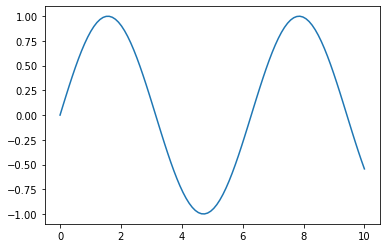

In [11]:
# The standard pattern
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x));

### Titles, Labels, and Limits

Every good plot needs context. The key methods on an `Axes` object are:

| Method | What it does |
|--------|--------------|
| `ax.set_title('...')` | Title above the plot |
| `ax.set_xlabel('...')` | Label for x-axis |
| `ax.set_ylabel('...')` | Label for y-axis |
| `ax.set_xlim(left, right)` | Zoom in/out on x-axis |
| `ax.set_ylim(bottom, top)` | Zoom in/out on y-axis |
| `ax.legend()` | Show legend (requires `label=` in plot calls) |

Tip: you can also set multiple properties at once with `ax.set(title=..., xlabel=..., ylabel=...)`.

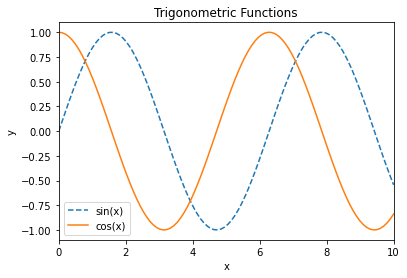

In [12]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), label='sin(x)', linestyle='--')
ax.plot(x, np.cos(x), label='cos(x)', linestyle='-')

ax.set(title='Trigonometric Functions',
       xlabel='x',
       ylabel='y',
       xlim=(0, 10))

ax.legend();

---

### ✏️ Exercise 1: Your First Plot (~8 min)

Build a line plot step by step:

**1a.** Create `x = np.linspace(0, 5, 100)`. Create a figure and axes using `plt.subplots()`. Plot `x` vs `x**2`.

**1b.** Add a second line: `x` vs `x**3`. Give each line a different `linestyle` and a `label`.

**1c.** Add a title, x-label, y-label, and a legend.

**1d.** Set the y-axis limit to `(0, 100)` using `set_ylim`.

**⭐ Extra:** Add a third line for `x**1.5` with `color='green'` and `linewidth=2`.

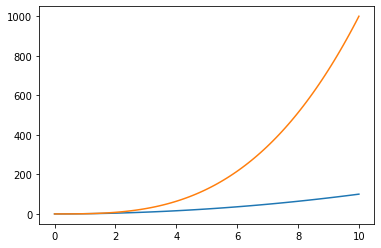

In [16]:
# The standard pattern
x = np.linspace(0, 10, 100)


fig, ax = plt.subplots()
ax.plot(x, x**2)
ax.plot(x, x**3)

In [ ]:
#@title Solution Exercise 1
x = np.linspace(0, 5, 100)

fig, ax = plt.subplots()

ax.plot(x, x**2, linestyle='--', label='x²')
ax.plot(x, x**3, linestyle='-.', label='x³')
ax.plot(x, x**1.5, color='green', linewidth=2, label='x^1.5')  # extra

ax.set(title='Polynomial Functions',
       xlabel='x',
       ylabel='y',
       ylim=(0, 100))

ax.legend();

---

## **2.** Core Plot Types

Matplotlib provides many plot types. The three most common for data analysis are:

| Plot type | Method | Best for |
|-----------|--------|----------|
| **Line plot** | `ax.plot(x, y)` | Trends over a continuous variable |
| **Scatter plot** | `ax.scatter(x, y)` | Relationships between two variables |
| **Histogram** | `ax.hist(x)` | Distribution of a single variable |

### Scatter Plots

`.scatter()` maps individual data points. Useful parameters:

- `s`: marker size
- `c`: marker colour (can be a single colour or an array for colour-mapping)
- `alpha`: transparency (0 = invisible, 1 = opaque)
- `cmap`: colourmap (e.g., `'viridis'`, `'coolwarm'`)
- `edgecolors`: outline colour

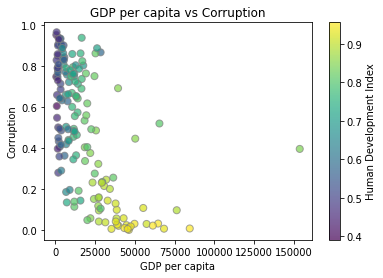

In [17]:
# Scatter with colour mapping
fig, ax = plt.subplots()

scatter = ax.scatter(qog['gdp_pc'], qog['corruption'],
                     c=qog['hdi'],       # colour by HDI
                     cmap='viridis',
                     alpha=0.7,
                     edgecolors='gray',
                     s=50)

ax.set(title='GDP per capita vs Corruption',
       xlabel='GDP per capita',
       ylabel='Corruption')

plt.colorbar(scatter, label='Human Development Index');

### Histograms

Use `ax.hist()` to visualise distributions. Key parameters:

- `bins`: number of bins (or explicit bin edges)
- `density`: if `True`, normalise to show probability density
- `histtype`: `'bar'`, `'step'`, `'stepfilled'`
- `alpha`: transparency — essential when overlapping multiple histograms

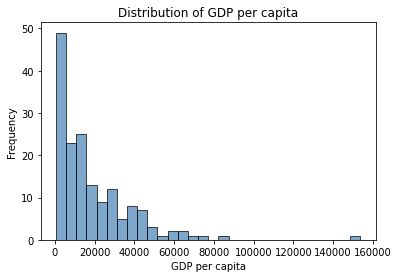

In [18]:
fig, ax = plt.subplots()

ax.hist(qog['gdp_pc'].dropna(), bins=30, alpha=0.7,
        edgecolor='black', color='steelblue')

ax.set(title='Distribution of GDP per capita',
       xlabel='GDP per capita',
       ylabel='Frequency');

---

### ✏️ Exercise 2: Scatter Plot with the QOG Dataset (~8 min)

**2a.** Create a scatter plot of `corruption` (x-axis) vs `hdi` (y-axis) from the QOG dataset.

**2b.** Set `alpha=0.6` and `s=40` to handle overlapping points.

**2c.** Colour the points by `gdp_pc` using the `c=` parameter with `cmap='coolwarm'`. Add a `colorbar`.

**2d.** Add a descriptive title and axis labels.

**⭐ Extra:** What pattern do you see? Does higher corruption correspond to higher or lower HDI? Try `cmap='RdYlGn'` for a more intuitive colour scheme.

In [ ]:
### YOUR CODE HERE ###



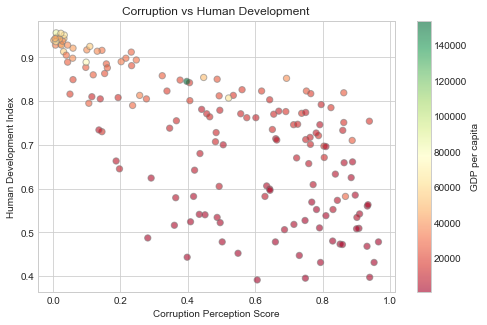

In [22]:
#@title Solution Exercise 2
fig, ax = plt.subplots(figsize=(8, 5))

scatter = ax.scatter(qog['corruption'], qog['hdi'],
                     c=qog['gdp_pc'], cmap='RdYlGn',
                     alpha=0.6, s=40, edgecolors='gray')

ax.set(title='Corruption vs Human Development',
       xlabel='Corruption Perception Score',
       ylabel='Human Development Index')

plt.colorbar(scatter, label='GDP per capita');

---

## **3.** Plot Customisation

Good plots communicate clearly. Three tools that help: **styles**, **annotations**, and **tick customisation**.

### Styles

Matplotlib ships with pre-built style sheets that change the overall look of your plots. You can apply a style with `plt.style.use()`.

In [19]:
# See all available styles
# print(plt.style.available)

# Apply a clean style for the rest of this notebook
plt.style.use('seaborn-v0_8-whitegrid')

### Text Annotations

Annotations help highlight specific data points. Two key functions:

| Function | What it does |
|----------|--------------|
| `ax.text(x, y, 'text')` | Place text at coordinates (x, y) |
| `ax.annotate('text', xy=..., xytext=..., arrowprops=...)` | Text with an arrow pointing to a data point |


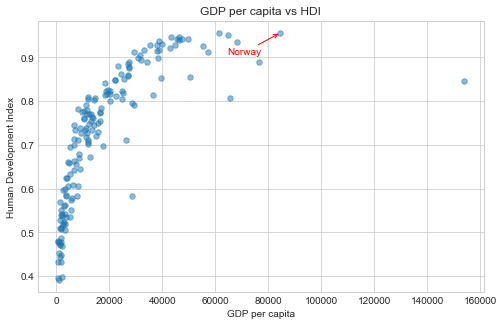

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(qog['gdp_pc'], qog['hdi'], alpha=0.5, s=30)

# Annotate a specific country
norway = qog[qog['country'] == 'Norway']
ax.annotate('Norway',
            xy=(norway['gdp_pc'].values[0], norway['hdi'].values[0]),
            xytext=(norway['gdp_pc'].values[0] - 20000, norway['hdi'].values[0] - 0.05),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red')

ax.set(title='GDP per capita vs HDI',
       xlabel='GDP per capita',
       ylabel='Human Development Index');

### Tick Customisation

Control what tick marks appear on the axes and how they look:

- `ax.set_xticks(positions)` / `ax.set_xticklabels(labels)`: set tick positions and custom labels
- `ax.tick_params(axis='x', rotation=45)`: rotate tick labels
- Useful when axis values are long strings (e.g., country names)

---

### ✏️ Exercise 3: Annotated QOG Plot (~8 min)

**3a.** Create a scatter plot of `gdp_pc` vs `corruption` from the QOG dataset.

**3b.** Find and annotate the country with the **highest GDP per capita**. Use `ax.annotate()` with an arrow.

*Hint:* Use `qog.loc[qog['gdp_pc'].idxmax()]` to find the row.

**3c.** Find and annotate the country with the **highest corruption** score.

**3d.** Add a title and axis labels.

**⭐ Extra:** Also annotate the country with the lowest corruption score. Use a different arrow colour.

In [ ]:
### YOUR CODE HERE ###



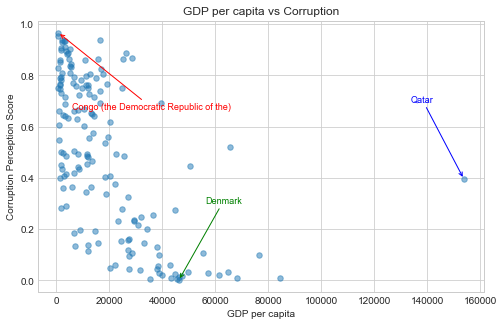

In [21]:
#@title Solution Exercise 3
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(qog['gdp_pc'], qog['corruption'], alpha=0.5, s=30)

# Highest GDP
top_gdp = qog.loc[qog['gdp_pc'].idxmax()]
ax.annotate(top_gdp['country'],
            xy=(top_gdp['gdp_pc'], top_gdp['corruption']),
            xytext=(top_gdp['gdp_pc'] - 20000, top_gdp['corruption'] + 0.3),
            arrowprops=dict(arrowstyle='->', color='blue'),
            fontsize=9, color='blue')

# Highest corruption
top_corr = qog.loc[qog['corruption'].idxmax()]
ax.annotate(top_corr['country'],
            xy=(top_corr['gdp_pc'], top_corr['corruption']),
            xytext=(top_corr['gdp_pc'] + 5000, top_corr['corruption'] - 0.3),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=9, color='red')

# Extra: lowest corruption
low_corr = qog.loc[qog['corruption'].idxmin()]
ax.annotate(low_corr['country'],
            xy=(low_corr['gdp_pc'], low_corr['corruption']),
            xytext=(low_corr['gdp_pc'] + 10000, low_corr['corruption'] + 0.3),
            arrowprops=dict(arrowstyle='->', color='green'),
            fontsize=9, color='green')

ax.set(title='GDP per capita vs Corruption',
       xlabel='GDP per capita',
       ylabel='Corruption Perception Score');

---

## **4.** Subplots

Multiple plots in one figure let you compare patterns side by side. There are two approaches:

**`plt.subplots(nrows, ncols)`** creates a grid of equally-sized subplots:

```python
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns
axes[0].plot(...)   # first subplot
axes[1].scatter(...)  # second subplot
axes[2].hist(...)   # third subplot
```

**`plt.subplot_mosaic(layout)`** creates custom layouts with named axes:

```python
layout = [
    ['A', 'B'],
    ['C', 'C']   # C spans both columns
]
fig, axes = plt.subplot_mosaic(layout, figsize=(10, 8))
axes['A'].plot(...)
```

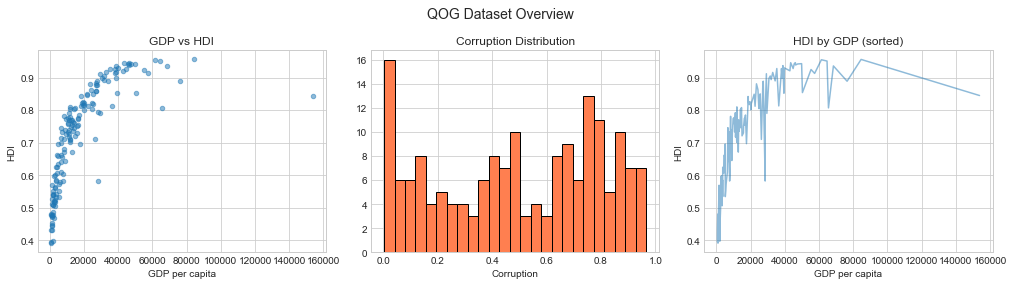

In [23]:
# Example: three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Left: scatter
axes[0].scatter(qog['gdp_pc'], qog['hdi'], alpha=0.5, s=20)
axes[0].set(title='GDP vs HDI', xlabel='GDP per capita', ylabel='HDI')

# Middle: histogram
axes[1].hist(qog['corruption'].dropna(), bins=25, color='coral', edgecolor='black')
axes[1].set(title='Corruption Distribution', xlabel='Corruption')

# Right: line (using sorted data)
sorted_qog = qog.sort_values('gdp_pc').dropna(subset=['gdp_pc', 'hdi'])
axes[2].plot(sorted_qog['gdp_pc'].values, sorted_qog['hdi'].values, alpha=0.5)
axes[2].set(title='HDI by GDP (sorted)', xlabel='GDP per capita', ylabel='HDI')

fig.suptitle('QOG Dataset Overview', fontsize=14)
plt.tight_layout();

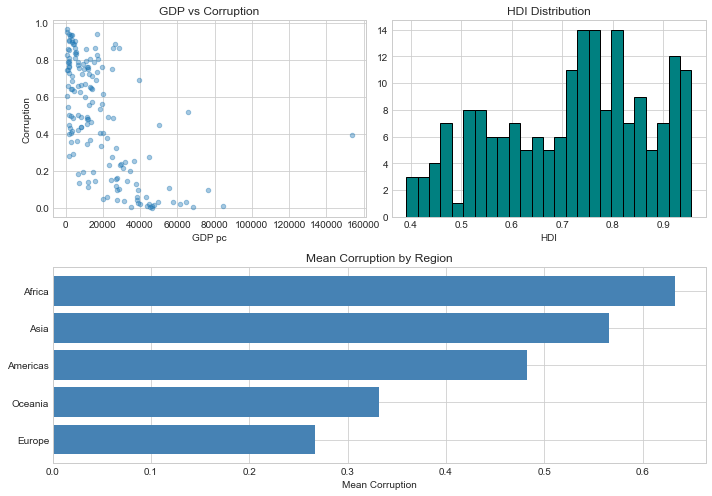

In [24]:
# Example: subplot_mosaic with custom layout
layout = [
    ['scatter', 'hist'],
    ['wide', 'wide']
]

fig, axes = plt.subplot_mosaic(layout, figsize=(10, 7))

axes['scatter'].scatter(qog['gdp_pc'], qog['corruption'], alpha=0.4, s=20)
axes['scatter'].set(title='GDP vs Corruption', xlabel='GDP pc', ylabel='Corruption')

axes['hist'].hist(qog['hdi'].dropna(), bins=25, color='teal', edgecolor='black')
axes['hist'].set(title='HDI Distribution', xlabel='HDI')

# Bar chart spanning the full width
region_means = qog.groupby('region')['corruption'].mean().sort_values()
axes['wide'].barh(region_means.index, region_means.values, color='steelblue')
axes['wide'].set(title='Mean Corruption by Region', xlabel='Mean Corruption')

plt.tight_layout();

---

### ✏️ Exercise 4: Multi-Panel Matplotlib Figure (~8 min)

Create a figure with **3 subplots in a row** using `plt.subplots(1, 3, figsize=(14, 4))`:

**4a.** Subplot 1: Histogram of `gdp_pc`

**4b.** Subplot 2: Histogram of `hdi`

**4c.** Subplot 3: Scatter plot of `gdp_pc` (x) vs `hdi` (y)

**4d.** Add titles and axis labels to each subplot. Add an overall title using `fig.suptitle()`.

**⭐ Extra:** Redo this using `subplot_mosaic` where the scatter plot spans both columns on the bottom row, and the two histograms sit side by side on top.

In [ ]:
### YOUR CODE HERE ###



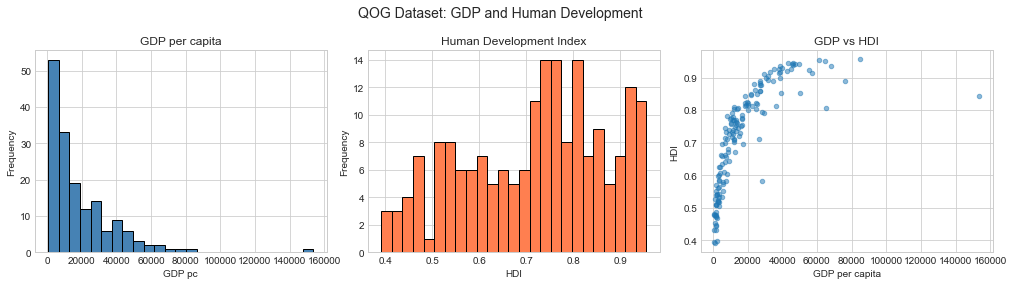

In [25]:
#@title Solution Exercise 4
# Basic version
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

axes[0].hist(qog['gdp_pc'].dropna(), bins=25, color='steelblue', edgecolor='black')
axes[0].set(title='GDP per capita', xlabel='GDP pc', ylabel='Frequency')

axes[1].hist(qog['hdi'].dropna(), bins=25, color='coral', edgecolor='black')
axes[1].set(title='Human Development Index', xlabel='HDI', ylabel='Frequency')

axes[2].scatter(qog['gdp_pc'], qog['hdi'], alpha=0.5, s=20)
axes[2].set(title='GDP vs HDI', xlabel='GDP per capita', ylabel='HDI')

fig.suptitle('QOG Dataset: GDP and Human Development', fontsize=14)
plt.tight_layout();

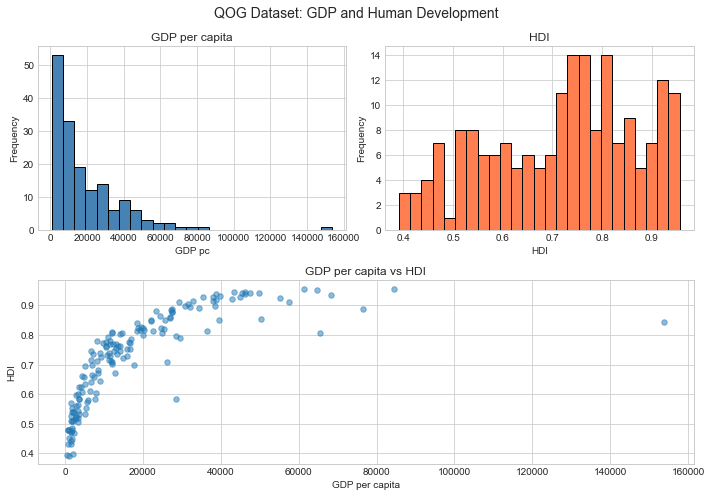

In [26]:
#@title Solution Exercise 4 Extra (Mosaic)
layout = [
    ['hist_gdp', 'hist_hdi'],
    ['scatter', 'scatter']
]

fig, axes = plt.subplot_mosaic(layout, figsize=(10, 7))

axes['hist_gdp'].hist(qog['gdp_pc'].dropna(), bins=25, color='steelblue', edgecolor='black')
axes['hist_gdp'].set(title='GDP per capita', xlabel='GDP pc', ylabel='Frequency')

axes['hist_hdi'].hist(qog['hdi'].dropna(), bins=25, color='coral', edgecolor='black')
axes['hist_hdi'].set(title='HDI', xlabel='HDI', ylabel='Frequency')

axes['scatter'].scatter(qog['gdp_pc'], qog['hdi'], alpha=0.5, s=30)
axes['scatter'].set(title='GDP per capita vs HDI', xlabel='GDP per capita', ylabel='HDI')

fig.suptitle('QOG Dataset: GDP and Human Development', fontsize=14)
plt.tight_layout();

---

# **Part 2: Seaborn**

<img src="https://cdn.githubraw.com/antndlcrx/Intro-to-Python-DPIR/main/images/W4/seaborn.jpg?raw=true:,  width=25" alt="My Image" width=175>

[Seaborn](https://seaborn.pydata.org/tutorial/introduction.html) is built on top of Matplotlib and designed for **statistical visualisation**. The key advantages:

- Works directly with Pandas DataFrames: pass column names as strings
- Built-in support for grouping by categories (`hue`, `col`, `row`)
- Attractive default styles
- Statistical overlays (regression lines, confidence intervals) built in

Think of it this way: **Matplotlib gives you full control, Seaborn gives you speed**. In practice, you'll often use Seaborn for the heavy lifting and Matplotlib for fine-tuning.

In [27]:
import seaborn as sns  # standard alias

## **5.** Seaborn Fundamentals

Seaborn functions come in two levels:

| Level | Examples | Operates on | Creates its own Figure? |
|-------|---------|-------------|------------------------|
| **Axes-level** | `sns.scatterplot()`, `sns.histplot()`, `sns.boxplot()` | A matplotlib `Axes` | No — you pass `ax=` |
| **Figure-level** | `sns.relplot()`, `sns.catplot()`, `sns.lmplot()` | A Seaborn `FacetGrid` | Yes — creates its own |

**Rule of thumb:** Use axes-level functions when you want to embed a Seaborn plot into a matplotlib Figure (e.g., a subplot). Use figure-level functions when you want Seaborn to handle the layout (e.g., faceting by group).

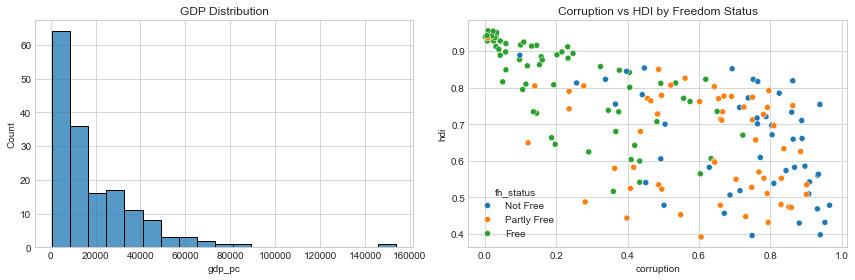

In [28]:
# Axes-level: fits into a matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=qog, x='gdp_pc', ax=axes[0])
axes[0].set_title('GDP Distribution')

sns.scatterplot(data=qog, x='corruption', y='hdi', hue='fh_status', ax=axes[1])
axes[1].set_title('Corruption vs HDI by Freedom Status')

plt.tight_layout();

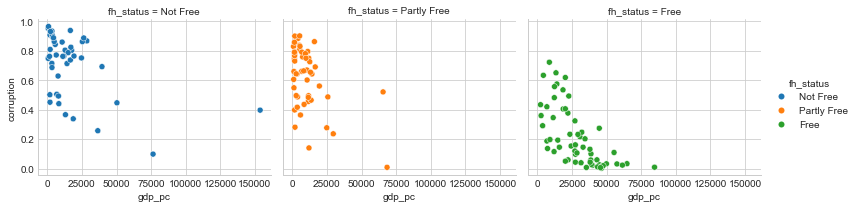

In [29]:
# Figure-level: creates its own figure, easy faceting
sns.relplot(data=qog, x='gdp_pc', y='corruption',
            hue='fh_status', col='fh_status',
            height=3, aspect=1.2);

---

### ✏️ Exercise 5: Merge PPI Dataset & Seaborn Exploration (~10 min)

Time to bring in a second dataset and reinforce your Week 3 merge skills!

**5a.** Load the PPI (Parliamentary Power Index) dataset. Drop the `'Unnamed: 0'` column.

```python
ppi_link = '/content/Intro-to-Python-DPIR/datasets/ppi.csv'
ppi = pd.read_csv(ppi_link)
ppi = ppi.drop('Unnamed: 0', axis=1)
```

**5b.** Merge `qog` and `ppi` on the country code column. Inspect the result. How many rows survived? Which column do they share?

*Hint:* Look at the column names in both DataFrames.

**5c.** Using Seaborn, create a `scatterplot` of `ppi` (x) vs `corruption` (y), coloured by `fh_status`.

**5d.** Create a `boxplot` showing the distribution of `ppi` across different `regime` types.

**⭐ Extra:** Use `sns.catplot()` to create the same boxplot, but faceted by `region` using `col='region'` and `col_wrap=3`.

In [ ]:
### YOUR CODE HERE ###



Merged shape: (158, 11)
Original QOG: 194 rows, PPI: 158 rows


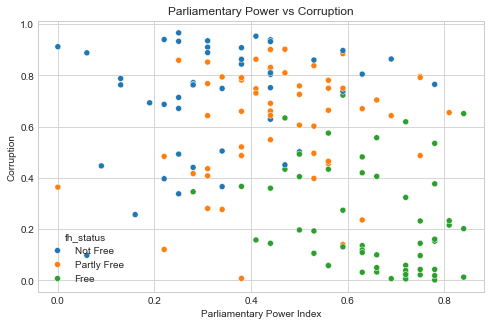

In [31]:
#@title Solution Exercise 5
# 5a: Load PPI
ppi_link = '../datasets/ppi.csv'
ppi = pd.read_csv(ppi_link)
ppi = ppi.drop('Unnamed: 0', axis=1)

ppi = ppi.rename(columns={
    'ccodealp': 'iso3c',
    'parl_power_index': 'ppi',
})

# 5b: Merge
df = qog.merge(ppi, on='iso3c')  # they share the iso3c column
print(f'Merged shape: {df.shape}')
print(f'Original QOG: {qog.shape[0]} rows, PPI: {ppi.shape[0]} rows')

# 5c: Scatter
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df, x='ppi', y='corruption', hue='fh_status', ax=ax)
ax.set(title='Parliamentary Power vs Corruption',
       xlabel='Parliamentary Power Index',
       ylabel='Corruption');


ValueError: Could not interpret value `regime` for `x`. An entry with this name does not appear in `data`.

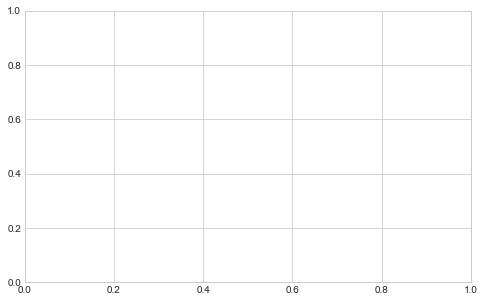

In [32]:
#@title Solution Exercise 5 (continued)
# 5d: Boxplot
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='fh_status', y='ppi', ax=ax)
ax.set(title='Parliamentary Power by Regime Type',
       xlabel='Regime Type',
       ylabel='Parliamentary Power Index')
ax.tick_params(axis='x', rotation=20);


In [33]:
#@title Solution Exercise 5 Extra
# Extra: Faceted boxplot
sns.catplot(data=df, x='fh_status', y='ppi',
            col='region', col_wrap=3,
            kind='box', height=3, aspect=1.3)
plt.xticks(rotation=30);

ValueError: Could not interpret value `regime` for `x`. An entry with this name does not appear in `data`.

---

## **6.** Regression Plots and Faceting

Two of Seaborn's most powerful features for exploratory data analysis.

### Regression Plots

Seaborn can overlay fitted regression lines on scatter plots:

| Function | Level | Key parameters |
|----------|-------|-----------------|
| `sns.regplot()` | Axes-level | `x`, `y`, `data`, `order` (polynomial degree), `ci` (confidence interval) |
| `sns.lmplot()` | Figure-level | Same + `hue`, `col`, `row` for faceting |

Use `lmplot` when you want to compare regression lines across groups.

In [ ]:
# regplot: single regression
fig, ax = plt.subplots(figsize=(7, 5))
sns.regplot(data=df, x='corruption', y='hdi', ax=ax,
            scatter_kws={'alpha': 0.4, 's': 20});

In [ ]:
# lmplot: regression lines by group
sns.lmplot(data=df, x='corruption', y='hdi',
           hue='fh_status', col='fh_status',
           height=4, aspect=1,
           scatter_kws={'alpha': 0.5, 's': 20});

### FacetGrid

For maximum flexibility in creating small multiples, use `FacetGrid` directly:

```python
g = sns.FacetGrid(data, col='category', hue='group', col_wrap=3)
g.map(sns.scatterplot, 'x_col', 'y_col')
g.add_legend()
```

This creates one panel per category, mapping the same plot type to each.

In [ ]:
# FacetGrid: scatter by region
g = sns.FacetGrid(df, col='region', hue='fh_status',
                  col_wrap=3, height=3, aspect=1.2)
g.map(sns.scatterplot, 'gdp_pc', 'corruption')
g.add_legend();

### Pair Plots

`PairGrid` (and its shortcut `sns.pairplot`) visualises **pairwise relationships** between multiple variables at once — useful for initial exploration.

- **Diagonal**: distribution of each variable (histogram or KDE)
- **Off-diagonal**: scatter plots between pairs
- You can map different plot types to upper, lower, and diagonal

In [ ]:
# Quick pairplot
sns.pairplot(df[['gdp_pc', 'corruption', 'hdi', 'ppi', 'fh_status']].dropna(),
             hue='fh_status', height=2.5,
             plot_kws={'alpha': 0.4, 's': 15});

In [ ]:
# PairGrid with different plot types per triangle
g = sns.PairGrid(df[['gdp_pc', 'corruption', 'hdi', 'perc_wip']].dropna())
g.map_upper(sns.scatterplot, alpha=0.4, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot);

---

### ✏️ Exercise 6: Faceted Regression Analysis (~8 min)

**6a.** Using `sns.lmplot()`, plot the relationship between `democracy` (x) and `corruption` (y) from the merged dataset. Colour by `fh_status`.

**6b.** Facet the plot by `region` using `col='region'` and `col_wrap=3`.

**6c.** Adjust the figure for readability: set `height=3`, `aspect=1.2`, and `scatter_kws={'alpha': 0.4, 's': 15}`.

**6d.** What do you notice? Do the relationships between democracy and corruption differ across regions?

**⭐ Extra:** Try `order=2` to fit polynomial regression lines. Does this better capture the relationship in any region?

In [ ]:
### YOUR CODE HERE ###



In [ ]:
#@title Solution Exercise 6
sns.lmplot(data=df, x='democracy', y='corruption',
           hue='fh_status', col='region', col_wrap=3,
           height=3, aspect=1.2,
           scatter_kws={'alpha': 0.4, 's': 15});

In [ ]:
#@title Solution Exercise 6 Extra
sns.lmplot(data=df, x='democracy', y='corruption',
           hue='fh_status', col='region', col_wrap=3,
           height=3, aspect=1.2, order=2,
           scatter_kws={'alpha': 0.4, 's': 15});

---

## **7.** 🏆 Final Exercise: QOG Dashboard (~15 min)

Bring everything together! Create a **dashboard-style figure** that tells a story about the relationship between governance, development, and parliamentary power.

Use `plt.subplot_mosaic()` with this layout:

```python
layout = [
    ['scatter', 'box'],
    ['bar',     'bar']
]
```

**Panel 'scatter':** Scatter plot of `corruption` vs `hdi`, coloured by `fh_status` (use `sns.scatterplot` with `ax=`)

**Panel 'box':** Box plot of `ppi` by `regime` type (use `sns.boxplot` with `ax=`)

**Panel 'bar' (spans full width):** Horizontal bar chart showing **mean corruption by region**, sorted ascending (use the Pandas `.plot.barh()` method or `ax.barh()`)

**Finishing touches:**
- Add a `fig.suptitle()` with a descriptive dashboard title
- Use `plt.tight_layout()` to prevent overlapping
- Use `figsize=(14, 9)` for enough space

**⭐ Extra challenges:**
- Rotate x-tick labels on the box plot for readability
- Annotate the region with the highest corruption on the bar chart
- Add a fourth panel to the mosaic with a `pairplot`-style scatter of your choice
- Save the figure using `fig.savefig('dashboard.png', dpi=150, bbox_inches='tight')`

In [ ]:
### YOUR CODE HERE ###



In [ ]:
#@title Solution Capstone
layout = [
    ['scatter', 'box'],
    ['bar',     'bar']
]

fig, axes = plt.subplot_mosaic(layout, figsize=(14, 9))

# --- Panel: Scatter ---
sns.scatterplot(data=df, x='corruption', y='hdi',
                hue='fh_status', alpha=0.6, s=30,
                ax=axes['scatter'])
axes['scatter'].set(title='Corruption vs Human Development',
                    xlabel='Corruption', ylabel='HDI')
axes['scatter'].legend(title='FH Status', fontsize=8)

# --- Panel: Boxplot ---
sns.boxplot(data=df, x='fh_status', y='ppi', ax=axes['box'])
axes['box'].set(title='Parliamentary Power by Regime',
                xlabel='Regime Type', ylabel='PPI')
axes['box'].tick_params(axis='x', rotation=20)

# --- Panel: Bar (spans full width) ---
region_corr = df.groupby('region')['corruption'].mean().sort_values()
axes['bar'].barh(region_corr.index, region_corr.values, color='steelblue')
axes['bar'].set(title='Mean Corruption by Region',
                xlabel='Mean Corruption Score')

# Annotate highest
axes['bar'].annotate(f'{region_corr.values[-1]:.2f}',
                     xy=(region_corr.values[-1], len(region_corr) - 1),
                     fontsize=9, color='red', fontweight='bold',
                     va='center', ha='left')

fig.suptitle('Governance, Development & Parliamentary Power Dashboard',
             fontsize=15, fontweight='bold')
plt.tight_layout();

# fig.savefig('dashboard.png', dpi=150, bbox_inches='tight')

---

## **Summary**

| Concept | Key Syntax | When to Use |
|---------|-----------|-------------|
| **Figure + Axes** | `fig, ax = plt.subplots()` | Every plot starts here |
| **Line plot** | `ax.plot(x, y)` | Trends over continuous data |
| **Scatter plot** | `ax.scatter(x, y)` | Relationships between variables |
| **Histogram** | `ax.hist(x, bins=...)` | Distributions |
| **Labels/Title** | `ax.set(title=..., xlabel=..., ylabel=...)` | Always |
| **Annotation** | `ax.annotate('text', xy=..., xytext=...)` | Highlight specific points |
| **Subplots** | `plt.subplots(nrows, ncols)` | Side-by-side comparison |
| **Mosaic** | `plt.subplot_mosaic(layout)` | Custom multi-panel layouts |
| **Seaborn scatter** | `sns.scatterplot(data=df, x=..., y=..., hue=...)` | Quick grouped scatter |
| **Seaborn histogram** | `sns.histplot(data=df, x=...)` | Quick distribution |
| **Regression** | `sns.lmplot(data=df, x=..., y=..., hue=...)` | Trend lines by group |
| **Faceting** | `sns.FacetGrid(data, col=..., hue=...)` | Small multiples |
| **Pair plots** | `sns.pairplot(df, hue=...)` | All pairwise relationships |
| **Save** | `fig.savefig('plot.png', dpi=150)` | Export for reports |

---

### Suggested Readings

- McKinney, Wes. (2022). *Python for Data Analysis*, Chapter 9.
- VanderPlas, Jake. (2022). *Python Data Science Handbook*, Chapters 25–36.
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html) — examples of what's possible.
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) — official guide.
- [Matplotlib Cheat Sheet](https://matplotlib.org/cheatsheets/) — quick reference.


---

## Extra: 3D Plots

Just for fun — Matplotlib can also create 3D visualisations. This is a parametric torus (donut). Not something you'll use daily, but a nice demonstration of what's possible!

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the torus
R = 2.0  # Distance from center of hole to center of tube
r = 1.0  # Radius of the tube

# Parametric grid
theta = np.linspace(0, 2*np.pi, 50)
phi = np.linspace(0, 2*np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='cyan', alpha=0.6, edgecolor='none')

for i in range(10):
    angle = 2 * np.pi * i / 10
    x_coord = (R + r) * np.cos(angle)
    y_coord = (R + r) * np.sin(angle)
    ax.text(x_coord, y_coord, 0, str(i), color='black', fontsize=12,
            ha='center', va='center')

ax.set_title('3D Donut (Torus) with Digits 0-9')
ax.view_init(elev=30, azim=45)
plt.tight_layout();